In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class LogisticRegression:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def loss(self, y, y_pred):
        return -(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred)).sum() / len(y)
    
    def fit(self, X, y, X_test, y_test, lr=0.001, epochs=100):
        m, n = X.shape
        y = y.reshape(m, 1)
        y_test = y_test.reshape(y_test.shape[0], 1)
        self.w = np.random.randn(n, 1)*0.001
        self.b = np.random.randn()*0.001
        
        for epoch in range(epochs):
            Z = X.dot(self.w) + self.b
            A = self.sigmoid(Z)
            
            dw = (X*(A-y)).sum(axis=0) / len(X)
            db = (A-y).sum(axis=0) / len(X)
            
            self.w -= dw.reshape(n, 1)*lr
            self.b -= db*lr
            
            predict = self.predict(X_test)
            print('Epoch: {0}  Loss: {1:.2f}  Accuracy: {2:.2f}%'.format(epoch+1, self.loss(y_test, predict), ((predict > 0.5) == y_test).sum() / len(predict) * 100))
        
    def predict(self, X):
        return self.sigmoid(X.dot(self.w) + self.b)


In [3]:
data = load_digits()
X = data['data']
y = (data['target'] >= 5).astype(np.int32)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train, X_test, y_test, lr=0.005, epochs=250)

Epoch: 1  Loss: 0.66  Accuracy: 71.11%
Epoch: 2  Loss: 0.62  Accuracy: 79.72%
Epoch: 3  Loss: 0.61  Accuracy: 68.06%
Epoch: 4  Loss: 0.60  Accuracy: 60.83%
Epoch: 5  Loss: 0.75  Accuracy: 49.17%
Epoch: 6  Loss: 0.98  Accuracy: 51.67%
Epoch: 7  Loss: 1.40  Accuracy: 48.33%
Epoch: 8  Loss: 1.16  Accuracy: 51.67%
Epoch: 9  Loss: 1.31  Accuracy: 48.33%
Epoch: 10  Loss: 1.08  Accuracy: 51.67%
Epoch: 11  Loss: 1.22  Accuracy: 48.89%
Epoch: 12  Loss: 0.99  Accuracy: 52.22%
Epoch: 13  Loss: 1.13  Accuracy: 49.72%
Epoch: 14  Loss: 0.90  Accuracy: 53.89%
Epoch: 15  Loss: 1.03  Accuracy: 51.11%
Epoch: 16  Loss: 0.81  Accuracy: 55.56%
Epoch: 17  Loss: 0.94  Accuracy: 55.56%
Epoch: 18  Loss: 0.73  Accuracy: 58.89%
Epoch: 19  Loss: 0.85  Accuracy: 57.50%
Epoch: 20  Loss: 0.66  Accuracy: 62.50%
Epoch: 21  Loss: 0.76  Accuracy: 60.00%
Epoch: 22  Loss: 0.59  Accuracy: 65.83%
Epoch: 23  Loss: 0.68  Accuracy: 64.44%
Epoch: 24  Loss: 0.53  Accuracy: 70.83%
Epoch: 25  Loss: 0.61  Accuracy: 67.78%
Epoch: 26

Epoch: 214  Loss: 0.27  Accuracy: 89.17%
Epoch: 215  Loss: 0.27  Accuracy: 89.17%
Epoch: 216  Loss: 0.27  Accuracy: 89.17%
Epoch: 217  Loss: 0.27  Accuracy: 89.17%
Epoch: 218  Loss: 0.27  Accuracy: 89.17%
Epoch: 219  Loss: 0.27  Accuracy: 89.17%
Epoch: 220  Loss: 0.27  Accuracy: 89.17%
Epoch: 221  Loss: 0.27  Accuracy: 89.17%
Epoch: 222  Loss: 0.26  Accuracy: 89.44%
Epoch: 223  Loss: 0.26  Accuracy: 89.44%
Epoch: 224  Loss: 0.26  Accuracy: 89.44%
Epoch: 225  Loss: 0.26  Accuracy: 89.44%
Epoch: 226  Loss: 0.26  Accuracy: 89.44%
Epoch: 227  Loss: 0.26  Accuracy: 89.44%
Epoch: 228  Loss: 0.26  Accuracy: 89.44%
Epoch: 229  Loss: 0.26  Accuracy: 89.44%
Epoch: 230  Loss: 0.26  Accuracy: 89.44%
Epoch: 231  Loss: 0.26  Accuracy: 89.44%
Epoch: 232  Loss: 0.26  Accuracy: 89.44%
Epoch: 233  Loss: 0.26  Accuracy: 89.44%
Epoch: 234  Loss: 0.26  Accuracy: 89.44%
Epoch: 235  Loss: 0.26  Accuracy: 89.44%
Epoch: 236  Loss: 0.26  Accuracy: 89.44%
Epoch: 237  Loss: 0.26  Accuracy: 89.44%
Epoch: 238  Loss

predict:  [0.17475798] no 
digit:  0


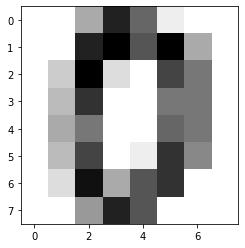

In [6]:
n = 0
img = data['data'][n]
predict = model.predict(img)
print("predict: ", predict, "no" if predict < 0.5 else "yes", "\ndigit: ", data['target'][n])
plt.imshow(img.reshape((8, 8)), cmap=plt.cm.binary)
plt.show()